# Classify the Iris flower based on sepal length, width, petal length and width 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Extracting csv data from folder to jupyter program and attach the label 

In [27]:
column_name = ['sepal length','sepal width','petal length','petal width','class']
iris_df = pd.read_csv('C:/Users/ACER/OneDrive/Desktop/iris/Iris.csv',header = None, names = column_name)
iris_df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris_df.shape

(150, 5)

In [12]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Exploratory data anaylsis (EDA) on Irish dataset

#### Plotting histogram of each attribute

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

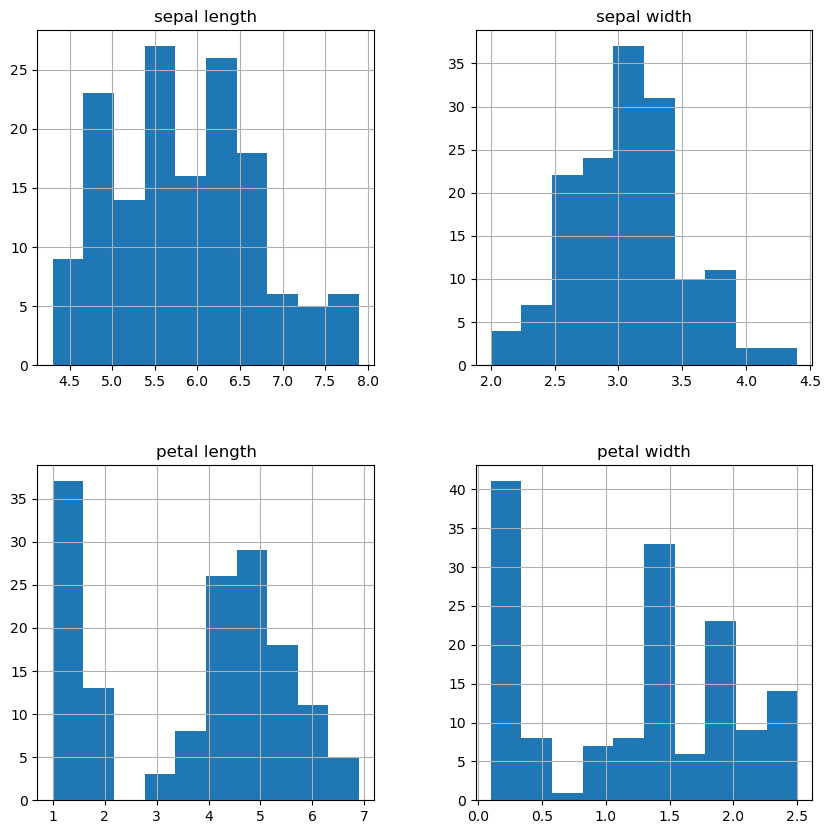

In [13]:
iris_df.hist(figsize = (10,10))

In [14]:
skew_attrib_val = iris_df.skew()
print(skew_attrib_val)

sepal length    0.314911
sepal width     0.318966
petal length   -0.274884
petal width    -0.102967
dtype: float64


C:\Users\ACER\AppData\Local\Temp\ipykernel_16888\97558780.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_attrib_val = iris_df.skew()


### Skewness interpretation :
#### 1) symmetrical distribution range : -0.5 to +0.5
#### 2) negative or left skewed range : -1 to -0.5
#### 3) positive or right skewed range : +0.5 to +1
#### 4) extremely skewed : less than -1 or greater than 1

Box plot of the dataset


<Axes: >

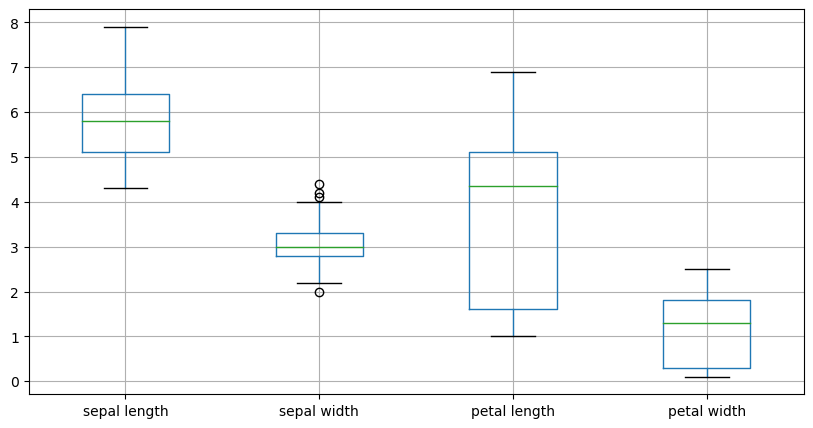

In [17]:
print("Box plot of the dataset")
iris_df.boxplot(figsize = (10,5))

### Interpretation of box plot

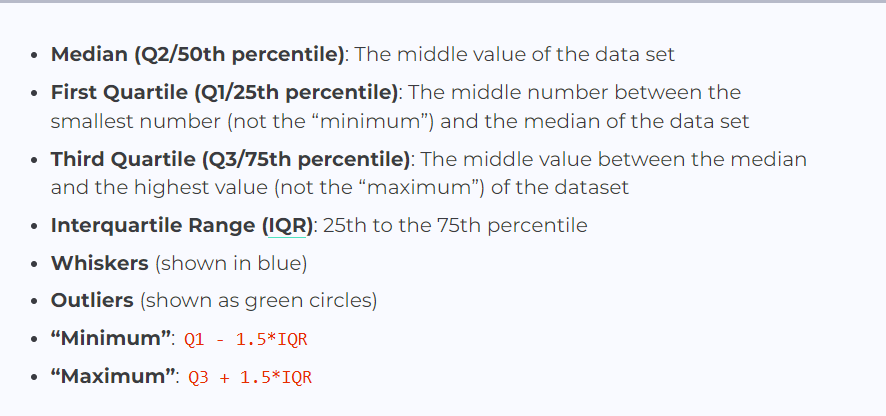

#### src: https://builtin.com/data-science/boxplot

In [28]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
#Converting categorical data into numerical value
iris_df['label']= label_encoder.fit_transform(iris_df['class'])
  
iris_df

,sepal length,sepal width,petal length,petal width,class,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


C:\Users\ACER\AppData\Local\Temp\ipykernel_16888\3777634581.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), annot=True)


<Axes: >

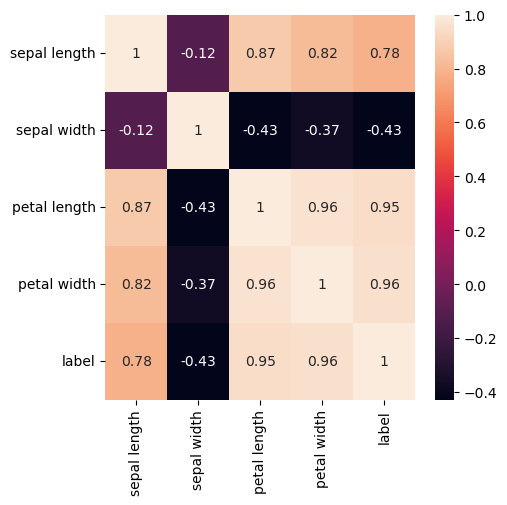

In [65]:
import seaborn as sns
plt.figure(figsize =(5,5))
sns.heatmap(iris_df.corr(), annot=True)

### Removing sepal width as its correlation coefficient is low with respect to 1

In [62]:
mock_data = iris_df.drop(labels = 'sepal width', axis = 1)
mock_data

,sepal length,petal length,petal width,class,label
0,5.1,1.4,0.2,Iris-setosa,0
1,4.9,1.4,0.2,Iris-setosa,0
2,4.7,1.3,0.2,Iris-setosa,0
3,4.6,1.5,0.2,Iris-setosa,0
4,5.0,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...
145,6.7,5.2,2.3,Iris-virginica,2
146,6.3,5.0,1.9,Iris-virginica,2
147,6.5,5.2,2.0,Iris-virginica,2
148,6.2,5.4,2.3,Iris-virginica,2


In [63]:
from sklearn.model_selection import train_test_split

spltd_data = mock_data.values
# separate the dataset into input and output components
X = spltd_data [:,0:3]
Y = spltd_data[:,4]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(("The Linear Regression model has given Accuracy of: %.3f%%") % (result*100.0))

The Linear Regression model has given Accuracy of: 92.289%
